### 📝 Imports

In [16]:
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from cats_dataset import CatsDataset
from src.augmentation.data_augmenter import DataAugmenter

### 🔧 Config

In [17]:
image_size = 512
num_samples = 8

image_set_path = '../data/all_photos/'

### 🌐 Create Transforms

In [18]:
transform = transforms.Compose([
    DataAugmenter(target_image_size=image_size, augment_images=True),
    transforms.ToTensor()
])

DataAugmenter initialized


### 🚦 Load Dataset

In [19]:
dataset = CatsDataset(
    root_dir=image_set_path,
    transform=transform
)

### 🖼 Visualize Augmented Images

DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5985644..1.6160713].


DataAugmenter output dtype: float32
DataAugmenter output dtype: float32
DataAugmenter output dtype: float32


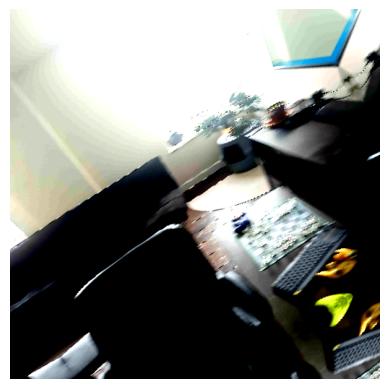

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.1579521].


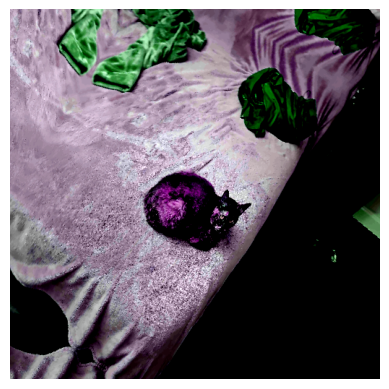

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.2484243].


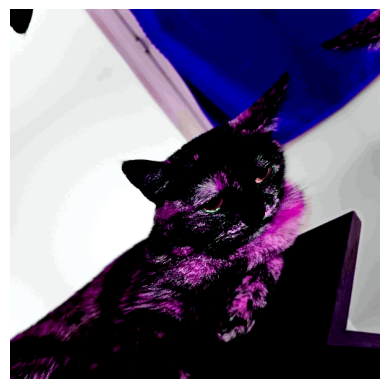

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.611111].


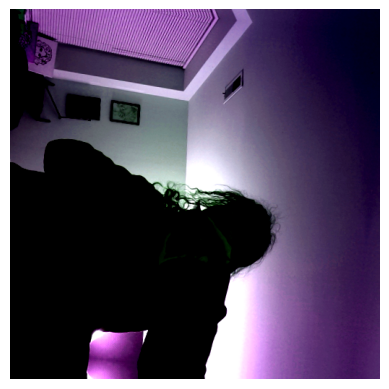

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.44975483..1.6160713].


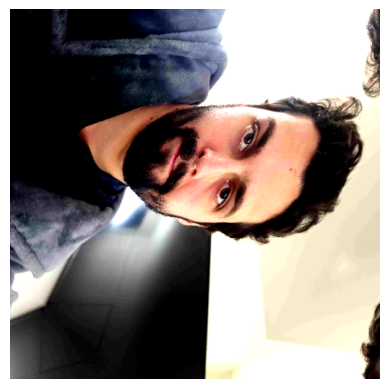

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.6160713].


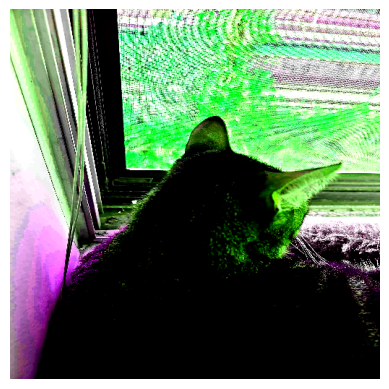

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61607134..1.6160713].


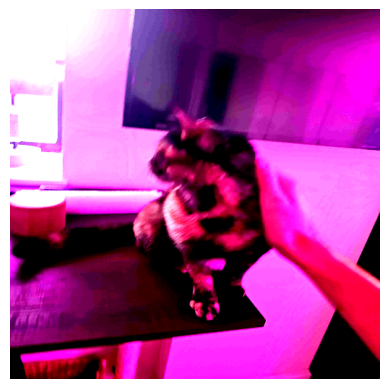

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29738557..1.6160713].


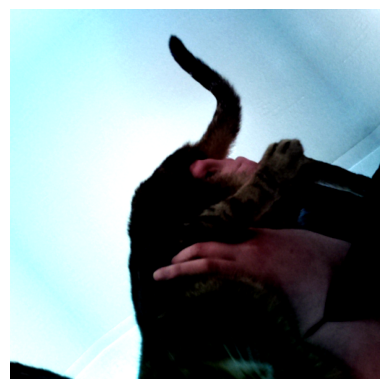

In [20]:
sample_loader = DataLoader(dataset, batch_size=num_samples, shuffle=True)

def show_image(img):
    img = img * 0.5 + 0.5 # unnormalize
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

    plt.show()


data_iter = iter(sample_loader)
images, labels = next(data_iter)

for i in range(images.size(0)):
    show_image(images[i])
    
